<a href="https://colab.research.google.com/github/yurifillippo/Analises-Exploratorias-e-Python/blob/master/Forecast_lencol.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pmdarima -q

     |████████████████████████████████| 1.5MB 15.7MB/s 
     |████████████████████████████████| 2.1MB 38.6MB/s 
     |████████████████████████████████| 9.5MB 44.9MB/s 


In [ ]:
#Importar bibliotecas
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller # importar o teste ADF
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARIMA

sns.set_style()

%config InlineBackend.figure_format = 'svg'

In [ ]:
#Importar dataset
df = pd.read_excel('/content/drive/MyDrive/Competições Kagle/Forecast teste/forecast lencol.xlsx')

#Transformar variável Emissão como datetime e index
df['Emissão'] = pd.to_datetime(df['Emissão'], format='%Y-%m-%d')
df.set_index(['Emissão'], inplace=True)

#Transformar em array
X = df['Expedida'].values

# aplicar ADF e imprimir o resultado
result = adfuller(X)

print('Dickey-result = adfuller(X)')
print('Teste Estatístico: {:.4f}'.format(result[0]))
print('Valor-p: {:.4f}'.format(result[1]))
print('Valores Críticos:')
for key, value in result[4].items():
	print('\t{}: {:.4f}'.format(key, value))

Dickey-result = adfuller(X)
Teste Estatístico: -21.2477
Valor-p: 0.0000
Valores Críticos:
	1%: -3.4437
	5%: -2.8674
	10%: -2.5699


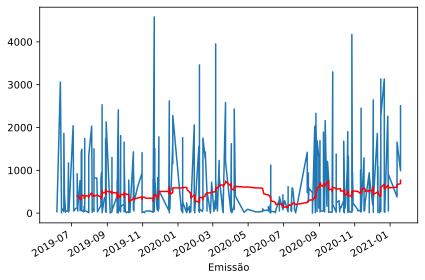

In [ ]:
ma = df.rolling(30).mean()

fig, ax = plt.subplots()
df.plot(ax=ax, legend=False)
ma.plot(ax=ax, color='r', legend=False)
plt.tight_layout()

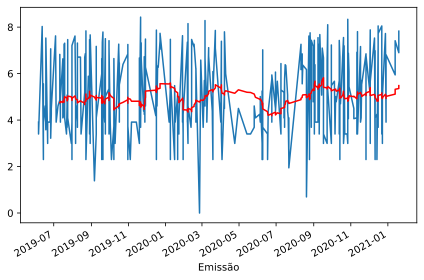

In [ ]:
# aplicar log
df_log = np.log(df)
ma_log = df_log.rolling(30).mean()

fig, ax = plt.subplots()
df_log.plot(ax=ax, legend=False)
ma_log.plot(ax=ax, color='r', legend=False)
plt.tight_layout()

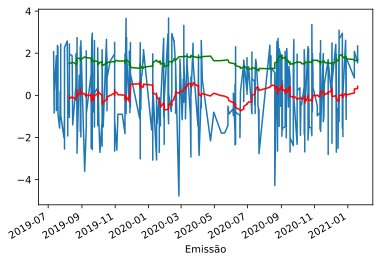

In [ ]:
# subtrair a média do log dos dados
df_sub = (df_log - ma_log).dropna()
ma_sub = df_sub.rolling(30).mean()
std_sub = df_sub.rolling(30).std()

fig, ax = plt.subplots()
df_sub.plot(ax=ax, legend=False)
ma_sub.plot(ax=ax, color= 'r', legend=False)
std_sub.plot(ax=ax, color='g', legend=False)
plt.show()


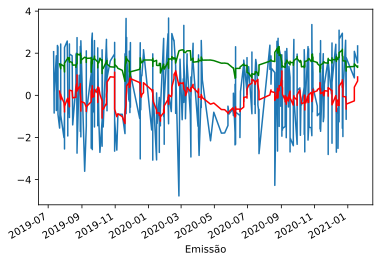

In [ ]:
# subtrair a média do log dos dados
df_sub = (df_log - ma_log).dropna()
ma_sub = df_sub.rolling(12).mean()
std_sub = df_sub.rolling(12).std()

fig, ax = plt.subplots()
df_sub.plot(ax=ax, legend=False)
ma_sub.plot(ax=ax, color='r', legend=False)
std_sub.plot(ax=ax, color='g', legend=False)
plt.show()

In [ ]:
# repetir o ADF
X_sub = df_sub['Expedida'].values

# aplicar ADF e imprimir o resultado
result_sub = adfuller(X_sub)
print('Dickey-Fuller Aumentado')
print('Teste Estatístico: {:.4f}'.format(result_sub[0]))
print('Valor-p: {:.10f}'.format(result_sub[1]))
print('Valores Críticos:')
for key, value in result_sub[4].items():
	print('\t{}: {:.4f}'.format(key, value))

Dickey-Fuller Aumentado
Teste Estatístico: -20.5520
Valor-p: 0.0000000000
Valores Críticos:
	1%: -3.4445
	5%: -2.8678
	10%: -2.5701


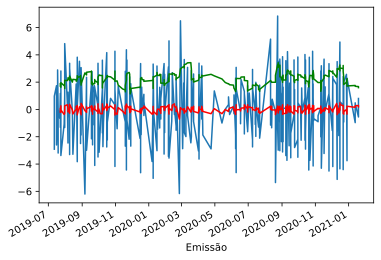

Dickey-Fuller Aumentado
Teste Estatístico: -11.1174
Valor-p: 0.0000000000
Valores Críticos:
	1%: -3.4448
	5%: -2.8679
	10%: -2.5702


In [ ]:
# aplicar diferenciação
df_diff = df_sub.diff(1)
ma_diff = df_diff.rolling(12).mean()
std_diff = df_diff.rolling(12).std()

fig, ax = plt.subplots()
df_diff.plot(ax=ax, legend=False)
ma_diff.plot(ax=ax, color='r', legend=False)
std_diff.plot(ax=ax, color='g', legend=False)
plt.show()

# extrair apenas os valores
X_diff = df_diff['Expedida'].dropna().values

# aplicar ADF e imprimir o resultado
result_diff = adfuller(X_diff)
print('Dickey-Fuller Aumentado')
print('Teste Estatístico: {:.4f}'.format(result_diff[0]))
print('Valor-p: {:.10f}'.format(result_diff[1]))
print('Valores Críticos:')
for key, value in result_diff[4].items():
	print('\t{}: {:.4f}'.format(key, value))

In [ ]:
lag_acf = acf(df_diff.dropna(), nlags=25)
lag_pacf = pacf(df_diff.dropna(), nlags=25, method='ols')

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:671: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning,


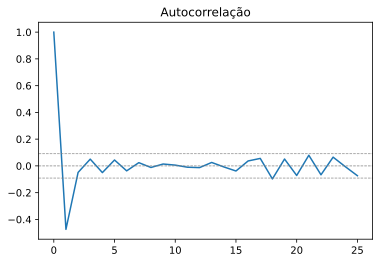

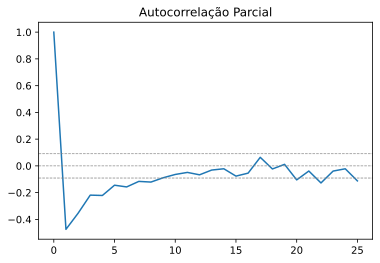

In [ ]:
# plotar ACR e PACF
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--', color='gray', linewidth=0.7)
plt.axhline(y=-1.96 / np.sqrt((len(df_diff) - 1)), linestyle='--', color='gray', linewidth=0.7)
plt.axhline(y=1.96 / np.sqrt((len(df_diff) - 1)), linestyle='--', color='gray', linewidth=0.7)
plt.title("Autocorrelação")
plt.show()

plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--', color='gray', linewidth=0.7)
plt.axhline(y=-1.96 / np.sqrt((len(df_diff) - 1)), linestyle='--', color='gray', linewidth=0.7)
plt.axhline(y=1.96 / np.sqrt((len(df_diff) - 1)), linestyle='--', color='gray', linewidth=0.7)
plt.title("Autocorrelação Parcial")
plt.show()

In [ ]:
model = ARIMA(df_log, order=(2,1,2))
result_AR = model.fit(disp = -1)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency informa

KeyError: ignored

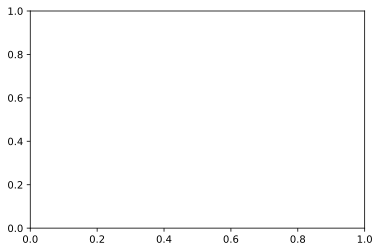

In [ ]:
# start="2018-02-01", end="2019-01-01"
result_AR.plot_predict(start="2019-06-06", end="2021-02-19");

In [ ]:
df.head()

,Expedida
Emissão,
2019-06-06,50
2019-06-06,30
2019-06-12,3060
2019-06-14,10
2019-06-14,260
